<a href="https://colab.research.google.com/github/3dwinGuxxman/ING_MED/blob/main/AF2_Se%C3%B1alesEMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACTIVIDAD FUNDAMENTAL 2. SEÑALES EMG**

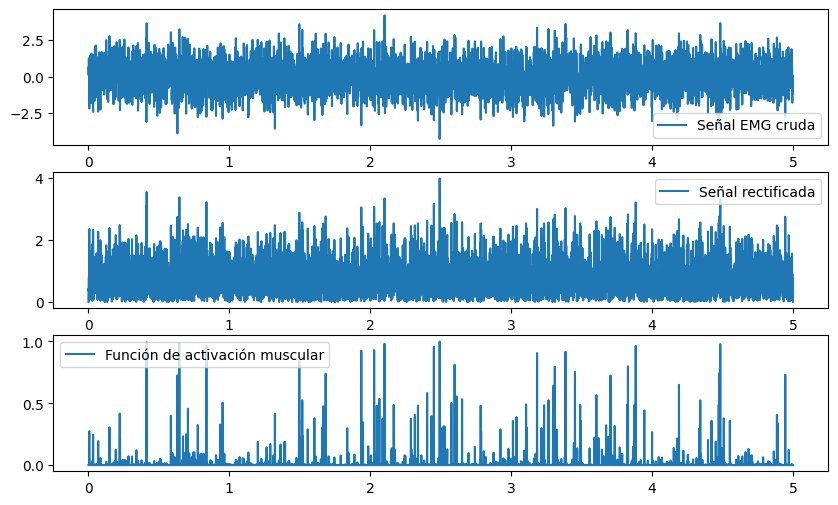

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from google.colab import files

# Simulación de una señal EMG sintética
def generate_emg_signal(duration=5, fs=1000):
    t = np.linspace(0, duration, duration * fs)
    noise = np.random.normal(0, 1, len(t))
    burst = np.sin(2 * np.pi * 50 * t) * (np.random.rand(len(t)) > 0.7)
    return t, noise + burst

# Rectificación de la señal (absoluta y cuadrática)
def rectify_signal(signal, method='absolute'):
    if method == 'absolute':
        return np.abs(signal)
    elif method == 'squared':
        return signal ** 2
    else:
        raise ValueError("Método no válido. Usar 'absolute' o 'squared'")

# Filtro pasa banda (20-450 Hz típico para EMG)
def bandpass_filter(sig, fs, lowcut=20, highcut=450, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, sig)

# Cálculo del umbral de activación muscular
def activation_threshold(signal, factor=3):
    mean = np.mean(signal)
    std_dev = np.std(signal)
    return mean + factor * std_dev

# Función de activación muscular (sigmoide)
def activation_function(x, threshold):
    return 1 / (1 + np.exp(-5 * (x - threshold)))

# Simulación de un electromiograma con 5 electrodos
fs = 1000  # Frecuencia de muestreo
duration = 5  # Duración en segundos
num_electrodes = 5

t, emg_signals = zip(*[generate_emg_signal(duration, fs) for _ in range(num_electrodes)])
filtered_signals = [bandpass_filter(sig, fs) for sig in emg_signals]
rectified_signals = [rectify_signal(sig, 'absolute') for sig in filtered_signals]
thresh = [activation_threshold(sig) for sig in rectified_signals]
activation = [activation_function(sig, thr) for sig, thr in zip(rectified_signals, thresh)]

# Visualización de un canal de ejemplo
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t[0], emg_signals[0], label='Señal EMG cruda')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t[0], rectified_signals[0], label='Señal rectificada')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[0], activation[0], label='Función de activación muscular')
plt.legend()

plt.show()

# Guardar y descargar resultados
np.savetxt("emg_data.csv", np.column_stack((t[0], emg_signals[0], rectified_signals[0], activation[0])), delimiter=",", header="Time,Raw EMG,Rectified EMG,Activation Function")
files.download("emg_data.csv")
